##  1. Defining the Question


### Prediction Analysis

As a football analyst in a company - Mchezopesa Ltd I need to accomplish the task below.

- A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

## a) Specifying the Data Analytic Question


## b) Defining the Metric of Success


## c) Understanding the Context


In [1]:

#Importing the Libraries that we will use

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from pandas import DataFrame
from sklearn.preprocessing import PolynomialFeatures


# let's create a function to read the data
def read_data(df):
    rankings = pd.read_csv('/Users/la/Documents/15_APR_IP_Chibudu_Nyiro/Week 6 IP Datasets/fifa_ranking.csv' ,parse_dates = ['rank_date'])
    results= pd.read_csv('/Users/la/Documents/15_APR_IP_Chibudu_Nyiro/Week 6 IP Datasets/results.csv',parse_dates = ['date'])

    if df == '19':
        return rankings
    elif df == '20':
        return results
    else:
        print('Invalid Data Set')

# let's print the 18 season data
rankings =read_data('19')
# print(rankings.head())
# let's print the 19 season data
results = read_data('20')
# print(results.head())

#### Checking for the Shape of the Datasets

In [352]:
print(f"\nThe Shape of the Results Data Set is: {results.shape}")
print(f"\nThe Shape of the Rankings Data Set is: {rankings.shape}")


The Shape of the Results Data Set is: (40839, 9)

The Shape of the Rankings Data Set is: (57793, 16)


### Previewing the DataSets

In [353]:
rankings.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [354]:
rankings.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [355]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [356]:
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


### Check for Appropriate Data Types

In [357]:
rankings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   rank                     57793 non-null  int64         
 1   country_full             57793 non-null  object        
 2   country_abrv             57793 non-null  object        
 3   total_points             57793 non-null  float64       
 4   previous_points          57793 non-null  int64         
 5   rank_change              57793 non-null  int64         
 6   cur_year_avg             57793 non-null  float64       
 7   cur_year_avg_weighted    57793 non-null  float64       
 8   last_year_avg            57793 non-null  float64       
 9   last_year_avg_weighted   57793 non-null  float64       
 10  two_year_ago_avg         57793 non-null  float64       
 11  two_year_ago_weighted    57793 non-null  float64       
 12  three_year_ago_avg       57793 n

In [358]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        40839 non-null  datetime64[ns]
 1   home_team   40839 non-null  object        
 2   away_team   40839 non-null  object        
 3   home_score  40839 non-null  int64         
 4   away_score  40839 non-null  int64         
 5   tournament  40839 non-null  object        
 6   city        40839 non-null  object        
 7   country     40839 non-null  object        
 8   neutral     40839 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 2.5+ MB


### Describing the Data Set

In [359]:
rankings.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [360]:
results.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


## Cleaning The Data Set

#### 1. Results Dataset

Based on my dataset and understanding of the tournaments system. The Project will only focus on the results and matches played during the FIFA World Cup tournament hence discarding any other tournaments. One other Data Point to be used would be the friendly matches, especially with a head to head of the teams used in the building of the model and prediction analysis.

In [361]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [2]:
if [(results['home_score']) > (results['away_score'])]:
    results.loc[(results['home_team'] == 'Germany') &
                (results['home_team'] == 'Germany'), 'Points'] = 3


else:
    results.head()

In [3]:
if [(results['home_score']) < (results['away_score'])]:
     results.loc[(results['away_team'] == 'Germany') &
                (results['away_team'] == 'Germany'), 'Points'] = 3
else:
    results.head()

In [4]:

if [(results['home_score']) == (results['away_score'])]:
    results.loc[(results['home_team'] == 'Germany') &
                (results['home_team'] == 'Germany'), 'Points'] = 1

elif [(results['home_score']) == (results['away_score'])]:
     results.loc[(results['away_team'] == 'Germany') &
                (results['away_team'] == 'Germany'), 'Points'] = 1

else:
      results.head()

In [5]:


if [(results['home_score']) > (results['away_score'])]:
    results.loc[(results['home_team'] == 'Brazil') &
                (results['home_team'] == 'Brazil'), 'Points'] = 3

elif [(results['home_score']) == (results['away_score'])]:
    results.loc[(results['home_team'] == 'Brazil') &
                (results['home_team'] == 'Brazil'), 'Points'] = 1

else:
    results.head()


In [6]:
# if [(results['home_score']) < (results['away_score'])]:
#      results.loc[(results['away_team'] == 'Germany') &
#                 (results['away_team'] == 'Germany'), 'Points'] = 3
# else:
#     results.head()


    

# if [(results['home_score']) < (results['away_score'])]:
#     results.loc[(results['away_Team'] == 'Brazil'), 'Points'] = 3

# if [(results['home_score']) == (results['away_score'])]:
#     results.loc[(results['away_Team'] == 'Brazil'), 'Points'] = 1
 

if [(results['home_score']) > (results['away_score'])]:
    results.loc[(results['home_team'] == 'Brazil') &
                (results['home_team'] == 'Brazil'), 'Points'] = 3

elif [(results['home_score']) == (results['away_score'])]:
    results.loc[(results['home_team'] == 'Brazil') &
                (results['home_team'] == 'Brazil'), 'Points'] = 1

else:
    results.head()

In [7]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Points
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,NaN
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,NaN
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,NaN
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,NaN
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,NaN


In [8]:
results['Points'].unique()

array([nan,  3.,  1.])

In [10]:
results_df = results[(results['tournament'] == 'Friendly') | (results['tournament'] == 'FIFA World Cup')]
results_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Points
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,NaN
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,NaN
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,NaN
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,NaN
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,NaN


In [11]:
# results_df = DataFrame(results_df)
results_df.sort_values(['date'], ascending=[False])

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Points
40681,2019-06-14,Madagascar,Mauritania,1,3,Friendly,Marrakech,Morocco,True,NaN
40680,2019-06-14,Cameroon,Mali,1,1,Friendly,Al Wakrah,Qatar,True,NaN
40679,2019-06-13,Egypt,Tanzania,1,0,Friendly,Alexandria,Egypt,False,NaN
40678,2019-06-12,Ynys Môn,Saint Helena,7,2,Friendly,Anglesey,Wales,False,NaN
40677,2019-06-12,Morocco,Gambia,0,1,Friendly,Marrakech,Morocco,False,NaN
...,...,...,...,...,...,...,...,...,...,...
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,NaN
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,NaN
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,NaN
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,NaN


I will drop dates from the Dataset, especially of any match that was played before 2009. 

The reason for this is to ensure that we ony have the matches before the FIFA World Cup considered and the Final friendly match as specified in the Data Set.

The FIFA WC started on 11 July 2010, hence I will only consider matches played before 11 July 2009

In [12]:
results_appr = results_df[results_df['date'] > '2009-07-11']
results_appr.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Points
31413,2009-07-12,Mayotte,Madagascar,2,2,Friendly,Mamoudzou,Mayotte,False,NaN
31416,2009-07-12,Saint Kitts and Nevis,Trinidad and Tobago,2,3,Friendly,Basseterre,Saint Kitts and Nevis,False,NaN
31417,2009-07-13,Iraq,Palestine,4,0,Friendly,Baghdad,Iraq,False,NaN
31419,2009-07-18,China PR,Palestine,3,1,Friendly,Tianjin,China PR,False,NaN
31425,2009-07-25,China PR,Kyrgyzstan,3,0,Friendly,Tianjin,China PR,False,NaN


In [396]:
results_appr.shape

(3705, 10)

### Check for Missing Values

In [397]:
# Checking for missing values in the dataset demographic data.
 
# Creating a function to check
def missing_values(data):
 
 # identifying the missing values from the demographic data dataset
 #
 miss = data.isnull().sum().sort_values(ascending = False)
 # finding the percentage of missing values
 percentage = (data.isnull().sum() / len(data)).sort_values(ascending = False)
 # storing  total missing values in percentage in dataframe
 #
 missing_data = pd.DataFrame({'Total' : miss, 'Percentage' : percentage})
 #if the percentage is 0, indicates no missing values hence removed
 #
 missing_data.drop(missing_data[missing_data['Percentage'] == 0].index, inplace = True)
 
 return missing_data
 
missing_values(results_appr)


,Total,Percentage
Points,3590,0.968961


The Data set has no missing values

### Check for Duplicate Values and anomalies

In [398]:
# occurrence based on all columns
duplicate = results_appr[results_appr.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Points


We have no duplicated values in the data set

In [399]:
# let's check for any entry that's not a string or an integer in the dataset
print(results_appr.select_dtypes(include=['object']).isnull().sum().any())

False


### Check for Outliers Using Box Plots

/var/folders/fx/g8czx7fs49jg83f3f0zm_7_80000gn/T/ipykernel_99944/2404832672.py:9: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


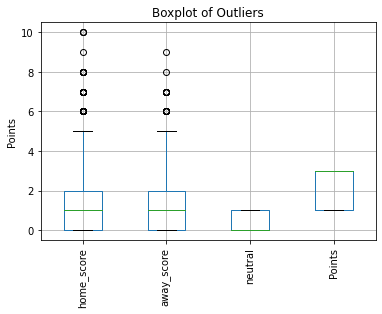

In [400]:
# let's check for outliers in the dataset using boxplot and give it a title and label

# let's create a function to plot the boxplot
def plot_boxplot(data,title,label):
    data.boxplot()
    plt.title(title)
    plt.xticks(rotation=90)
    plt.ylabel('Points')
    plt.show()

plot_boxplot(results_appr, 'Boxplot of Outliers', 'Points')

The data shows some outliers, however these are common in sports to have teams with varied goal scoring ability hence my decision to not drop any rows/values from the data set

### Preparation of the Dataset

In [13]:
Germany_result = results_appr[(results_appr['home_team'] == 'Germany') | (results_appr['away_team'] == 'Germany')]
Germany_result.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Points
31515,2009-09-05,Germany,South Africa,2,0,Friendly,Leverkusen,Germany,False,1.0
31769,2009-11-18,Germany,Ivory Coast,2,2,Friendly,Gelsenkirchen,Germany,False,1.0
31946,2010-03-03,Germany,Argentina,0,1,Friendly,Munich,Germany,False,1.0
31999,2010-05-13,Germany,Malta,3,0,Friendly,Aachen,Germany,False,1.0
32043,2010-05-29,Hungary,Germany,0,3,Friendly,Budapest,Hungary,False,3.0


Now I will ensure that the match result is represented in a column of its own.

In [23]:
# Declare a list that is to be converted into a column
# for team in 
# points = Germany_result.loc[(Germany_result['home_score']) - (Germany_result['home_score'])]
# points
 
# def column (col):
   
 
# # Using 'Address' as the column name
# # and equating it to the list
# df['Address'] = address

### 2. Rankings Dataset

In [402]:
rankings.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [403]:
rankings['confederation'].unique()

array(['UEFA', 'CONMEBOL', 'CONCACAF', 'CAF', 'AFC', 'OFC'], dtype=object)

In [14]:
rankings_df = rankings[(rankings['confederation'] == 'UEFA') | (rankings['confederation'] == 'CONMEBOL')]
rankings_df.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [15]:
rankings_appr = rankings_df[rankings_df['rank_date'] > '2009-07-11']
rankings_appr.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
35619,1,Brazil,BRA,0.0,1672,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,2009-08-05
35620,2,Spain,ESP,0.0,1590,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,2009-08-05
35621,3,Netherlands,NED,0.0,1379,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,2009-08-05
35622,4,Germany,GER,0.0,1207,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,2009-08-05
35623,5,Italy,ITA,0.0,1229,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,2009-08-05


In [406]:
rankings_appr.shape

(6724, 16)

In [16]:
rank = rankings_appr.sort_values(['total_points'], ascending=[False])
rank.head(20)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
50014,1,Germany,GER,1775.03,1687,0,1153.12,1153.12,559.35,279.68,770.63,231.19,555.23,111.05,UEFA,2015-06-04
49387,1,Germany,GER,1770.06,1729,0,1126.04,1126.04,567.58,283.79,805.07,241.52,593.50,118.70,UEFA,2015-03-12
48129,1,Germany,GER,1765.05,1736,0,1158.66,1158.66,507.09,253.55,804.67,241.40,557.21,111.44,UEFA,2014-09-18
47919,1,Germany,GER,1735.72,1724,0,1112.98,1112.98,497.45,248.73,834.82,250.45,617.83,123.57,UEFA,2014-08-14
49178,1,Germany,GER,1728.78,1725,0,1090.54,1090.54,568.45,284.23,751.40,225.42,642.96,128.59,UEFA,2015-02-12
48549,1,Germany,GER,1725.29,1669,0,1090.54,1090.54,566.83,283.42,765.86,229.76,607.88,121.58,UEFA,2014-11-27
48969,1,Germany,GER,1725.29,1725,0,1090.54,1090.54,566.83,283.42,765.86,229.76,607.88,121.58,UEFA,2015-01-08
48759,1,Germany,GER,1725.29,1725,0,1090.54,1090.54,566.83,283.42,765.86,229.76,607.88,121.58,UEFA,2014-12-18
47709,1,Germany,GER,1723.84,1300,1,1112.98,1112.98,497.45,248.73,818.37,245.51,583.08,116.62,UEFA,2014-07-17
55050,1,Brazil,BRA,1715.02,1672,0,1038.91,1038.91,555.56,277.78,793.26,237.98,801.78,160.36,CONMEBOL,2017-06-01


Make a Data Set with only Germany and Brazil Rankings

In [17]:
ger_bra = rank[(rank['country_full'] == 'Brazil') | (rank['country_full'] == 'Germany')]
ger_bra

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
50014,1,Germany,GER,1775.03,1687,0,1153.12,1153.12,559.35,279.68,770.63,231.19,555.23,111.05,UEFA,2015-06-04
49387,1,Germany,GER,1770.06,1729,0,1126.04,1126.04,567.58,283.79,805.07,241.52,593.50,118.70,UEFA,2015-03-12
48129,1,Germany,GER,1765.05,1736,0,1158.66,1158.66,507.09,253.55,804.67,241.40,557.21,111.44,UEFA,2014-09-18
47919,1,Germany,GER,1735.72,1724,0,1112.98,1112.98,497.45,248.73,834.82,250.45,617.83,123.57,UEFA,2014-08-14
49178,1,Germany,GER,1728.78,1725,0,1090.54,1090.54,568.45,284.23,751.40,225.42,642.96,128.59,UEFA,2015-02-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38726,3,Germany,GER,0.00,1489,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,2010-12-15
38727,4,Brazil,BRA,0.00,1493,-1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,2010-12-15
38933,3,Germany,GER,0.00,1485,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,2011-01-12
38934,4,Brazil,BRA,0.00,1447,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,2011-01-12


/var/folders/fx/g8czx7fs49jg83f3f0zm_7_80000gn/T/ipykernel_99944/1778769097.py:9: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


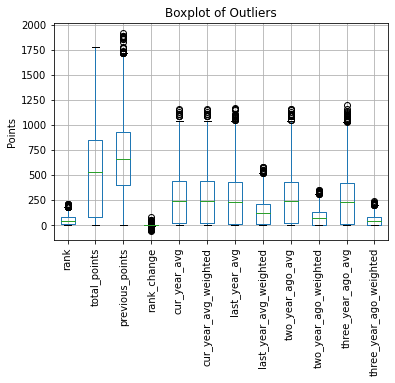

In [410]:
# let's check for outliers in the dataset using boxplot and give it a title and label

# let's create a function to plot the boxplot
def plot_boxplot(data,title,label):
    data.boxplot()
    plt.title(title)
    plt.xticks(rotation=90)
    plt.ylabel('Points')
    plt.show()

plot_boxplot(rankings_appr, 'Boxplot of Outliers', 'Points')

In [411]:
# Checking for missing values in the dataset demographic data.
 
# Creating a function to check
def missing_values(data):
 
 # identifying the missing values from the demographic data dataset
 #
 miss = data.isnull().sum().sort_values(ascending = False)
 # finding the percentage of missing values
 percentage = (data.isnull().sum() / len(data)).sort_values(ascending = False)
 # storing  total missing values in percentage in dataframe
 #
 missing_data = pd.DataFrame({'Total' : miss, 'Percentage' : percentage})
 #if the percentage is 0, indicates no missing values hence removed
 #
 missing_data.drop(missing_data[missing_data['Percentage'] == 0].index, inplace = True)
 
 return missing_data
 
missing_values(rankings_appr)

,Total,Percentage


In [18]:
Ger_Bra_result = results_appr[(results_appr['home_team'] == 'Germany') | (results_appr['away_team'] == 'Germany') | (results_appr['home_team'] == 'Brazil') | (results_appr['away_team'] == 'Brazil')]

In [413]:
Ger_Bra_result

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Points
31443,2009-08-12,Estonia,Brazil,0,1,Friendly,Tallinn,Estonia,False,NaN
31515,2009-09-05,Germany,South Africa,2,0,Friendly,Leverkusen,Germany,False,1.0
31716,2009-11-14,Brazil,England,1,0,Friendly,Doha,Qatar,True,3.0
31758,2009-11-17,Oman,Brazil,0,2,Friendly,Muscat,Oman,False,NaN
31769,2009-11-18,Germany,Ivory Coast,2,2,Friendly,Gelsenkirchen,Germany,False,1.0
...,...,...,...,...,...,...,...,...,...,...
40419,2019-03-20,Germany,Serbia,1,1,Friendly,Wolfsburg,Germany,False,1.0
40450,2019-03-23,Brazil,Panama,1,1,Friendly,Porto,Portugal,True,3.0
40497,2019-03-26,Czech Republic,Brazil,1,3,Friendly,Prague,Czech Republic,False,NaN
40570,2019-06-05,Brazil,Qatar,2,0,Friendly,Brasilia,Brazil,False,3.0


In [19]:
data = Ger_Bra_result.fillna(0)
data

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Points
31443,2009-08-12,Estonia,Brazil,0,1,Friendly,Tallinn,Estonia,False,0.0
31515,2009-09-05,Germany,South Africa,2,0,Friendly,Leverkusen,Germany,False,1.0
31716,2009-11-14,Brazil,England,1,0,Friendly,Doha,Qatar,True,3.0
31758,2009-11-17,Oman,Brazil,0,2,Friendly,Muscat,Oman,False,0.0
31769,2009-11-18,Germany,Ivory Coast,2,2,Friendly,Gelsenkirchen,Germany,False,1.0
...,...,...,...,...,...,...,...,...,...,...
40419,2019-03-20,Germany,Serbia,1,1,Friendly,Wolfsburg,Germany,False,1.0
40450,2019-03-23,Brazil,Panama,1,1,Friendly,Porto,Portugal,True,3.0
40497,2019-03-26,Czech Republic,Brazil,1,3,Friendly,Prague,Czech Republic,False,0.0
40570,2019-06-05,Brazil,Qatar,2,0,Friendly,Brasilia,Brazil,False,3.0


In [20]:
# Create New Column with Brazil or Germany as the Listed Team
Team = (data['home_team'] == 'Brazil') | (data['away_team'] == 'Brazil')  
data['Team']  = Team


data.head()
   

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Points,Team
31443,2009-08-12,Estonia,Brazil,0,1,Friendly,Tallinn,Estonia,False,0.0,True
31515,2009-09-05,Germany,South Africa,2,0,Friendly,Leverkusen,Germany,False,1.0,False
31716,2009-11-14,Brazil,England,1,0,Friendly,Doha,Qatar,True,3.0,True
31758,2009-11-17,Oman,Brazil,0,2,Friendly,Muscat,Oman,False,0.0,True
31769,2009-11-18,Germany,Ivory Coast,2,2,Friendly,Gelsenkirchen,Germany,False,1.0,False


In [21]:
# Properly Labeling the Teams in the Teams Column

data['Team'] = np.where(data['Team'], 'Brazil', 'Germany')

In [480]:
data['Team'].unique()

array(['Brazil', 'Germany'], dtype=object)

In [22]:
# Create New Column with Brazil or Germany as the Listed Team
Team_bl = (data['home_team'] == 'Brazil') | (data['away_team'] == 'Brazil')  
data['Team_bl']  = Team_bl


data.head()
   

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Points,Team,Team_bl
31443,2009-08-12,Estonia,Brazil,0,1,Friendly,Tallinn,Estonia,False,0.0,Brazil,True
31515,2009-09-05,Germany,South Africa,2,0,Friendly,Leverkusen,Germany,False,1.0,Germany,False
31716,2009-11-14,Brazil,England,1,0,Friendly,Doha,Qatar,True,3.0,Brazil,True
31758,2009-11-17,Oman,Brazil,0,2,Friendly,Muscat,Oman,False,0.0,Brazil,True
31769,2009-11-18,Germany,Ivory Coast,2,2,Friendly,Gelsenkirchen,Germany,False,1.0,Germany,False


In [23]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
 
data = pd.DataFrame(data)
label_encoder.fit(data['Team_bl'])
 
data['Team_bl'] = label_encoder.transform(data['Team_bl'])
 
data.head()


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Points,Team,Team_bl
31443,2009-08-12,Estonia,Brazil,0,1,Friendly,Tallinn,Estonia,False,0.0,Brazil,1
31515,2009-09-05,Germany,South Africa,2,0,Friendly,Leverkusen,Germany,False,1.0,Germany,0
31716,2009-11-14,Brazil,England,1,0,Friendly,Doha,Qatar,True,3.0,Brazil,1
31758,2009-11-17,Oman,Brazil,0,2,Friendly,Muscat,Oman,False,0.0,Brazil,1
31769,2009-11-18,Germany,Ivory Coast,2,2,Friendly,Gelsenkirchen,Germany,False,1.0,Germany,0


In [24]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
 
data = pd.DataFrame(data)
label_encoder.fit(data['neutral'])
 
data['neutral'] = label_encoder.transform(data['neutral'])
 
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Points,Team,Team_bl
31443,2009-08-12,Estonia,Brazil,0,1,Friendly,Tallinn,Estonia,0,0.0,Brazil,1
31515,2009-09-05,Germany,South Africa,2,0,Friendly,Leverkusen,Germany,0,1.0,Germany,0
31716,2009-11-14,Brazil,England,1,0,Friendly,Doha,Qatar,1,3.0,Brazil,1
31758,2009-11-17,Oman,Brazil,0,2,Friendly,Muscat,Oman,0,0.0,Brazil,1
31769,2009-11-18,Germany,Ivory Coast,2,2,Friendly,Gelsenkirchen,Germany,0,1.0,Germany,0


In [484]:
data['tournament'].unique()

array(['Friendly', 'FIFA World Cup'], dtype=object)

In [25]:
# Create New Column with Types of the Tournament as a boolean value 

tournament_bl = (data['tournament'] == 'Friendly') | (data['tournament'] == 'FIFA World Cup')  
data['tournament_bl']  = tournament_bl


data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Points,Team,Team_bl,tournament_bl
31443,2009-08-12,Estonia,Brazil,0,1,Friendly,Tallinn,Estonia,0,0.0,Brazil,1,True
31515,2009-09-05,Germany,South Africa,2,0,Friendly,Leverkusen,Germany,0,1.0,Germany,0,True
31716,2009-11-14,Brazil,England,1,0,Friendly,Doha,Qatar,1,3.0,Brazil,1,True
31758,2009-11-17,Oman,Brazil,0,2,Friendly,Muscat,Oman,0,0.0,Brazil,1,True
31769,2009-11-18,Germany,Ivory Coast,2,2,Friendly,Gelsenkirchen,Germany,0,1.0,Germany,0,True


In [26]:
# - The tournament is a float64 but it should be an int64
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
 
data = pd.DataFrame(data)
label_encoder.fit(data['tournament'])
 
data['tournament_bl'] = label_encoder.transform(data['tournament'])
 
data


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Points,Team,Team_bl,tournament_bl
31443,2009-08-12,Estonia,Brazil,0,1,Friendly,Tallinn,Estonia,0,0.0,Brazil,1,1
31515,2009-09-05,Germany,South Africa,2,0,Friendly,Leverkusen,Germany,0,1.0,Germany,0,1
31716,2009-11-14,Brazil,England,1,0,Friendly,Doha,Qatar,1,3.0,Brazil,1,1
31758,2009-11-17,Oman,Brazil,0,2,Friendly,Muscat,Oman,0,0.0,Brazil,1,1
31769,2009-11-18,Germany,Ivory Coast,2,2,Friendly,Gelsenkirchen,Germany,0,1.0,Germany,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40419,2019-03-20,Germany,Serbia,1,1,Friendly,Wolfsburg,Germany,0,1.0,Germany,0,1
40450,2019-03-23,Brazil,Panama,1,1,Friendly,Porto,Portugal,1,3.0,Brazil,1,1
40497,2019-03-26,Czech Republic,Brazil,1,3,Friendly,Prague,Czech Republic,0,0.0,Brazil,1,1
40570,2019-06-05,Brazil,Qatar,2,0,Friendly,Brasilia,Brazil,0,3.0,Brazil,1,1


## Exploratory Data Analysis

In [488]:
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Points,Team,Team_bl,tournament_bl,Team_Index
31443,2009-08-12,Estonia,Brazil,0,1,Friendly,Tallinn,Estonia,0,0.0,Brazil,1,1,0
31515,2009-09-05,Germany,South Africa,2,0,Friendly,Leverkusen,Germany,0,1.0,Germany,0,1,0
31716,2009-11-14,Brazil,England,1,0,Friendly,Doha,Qatar,1,3.0,Brazil,1,1,0
31758,2009-11-17,Oman,Brazil,0,2,Friendly,Muscat,Oman,0,0.0,Brazil,1,1,0
31769,2009-11-18,Germany,Ivory Coast,2,2,Friendly,Gelsenkirchen,Germany,0,1.0,Germany,0,1,0


In [489]:
# barplot function for value counts
def barplot(column):
  data[column].value_counts().plot.bar(figsize=(35,15))
  #sns.barplot(y = data[column].value_counts())
  plt.title('Barplot for {}'.format(column))
  plt.xlabel(column)
  plt.ylabel('Count')
  return plt.show()

/var/folders/fx/g8czx7fs49jg83f3f0zm_7_80000gn/T/ipykernel_99944/4069787053.py:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  return plt.show()


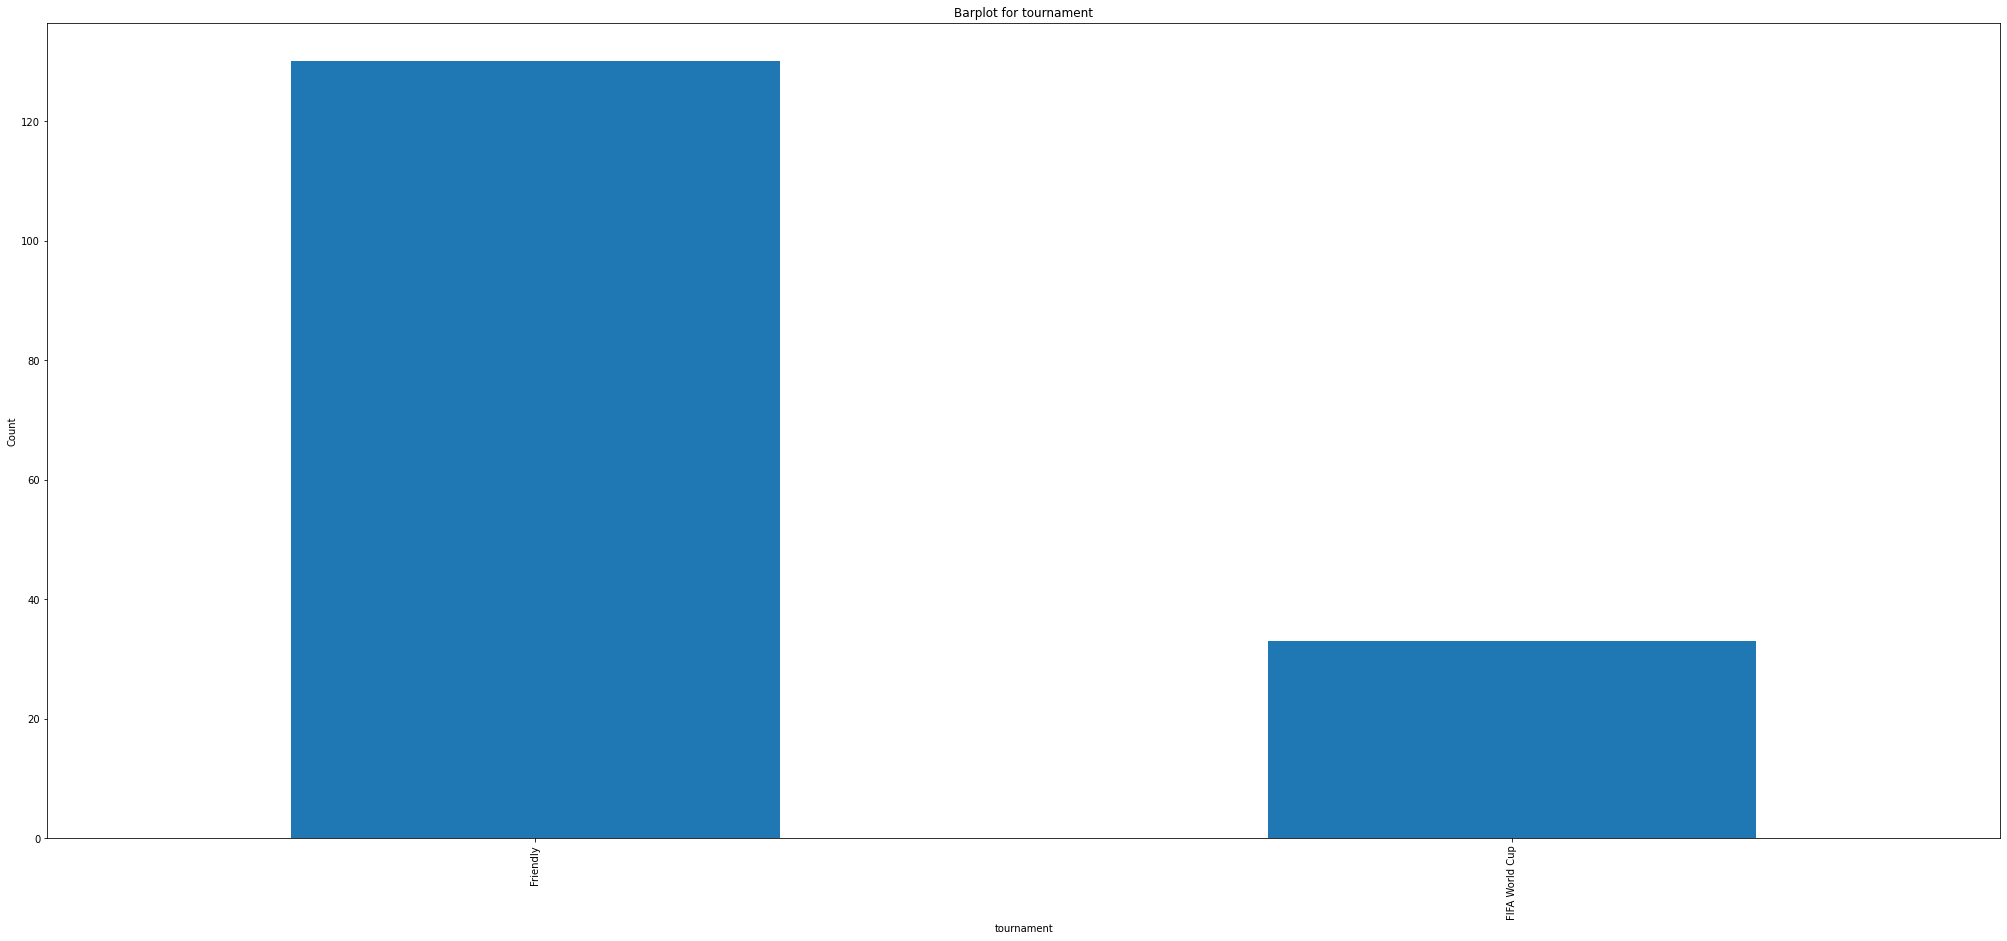

In [490]:
# tournament representation
barplot('tournament')

numpy.ndarray

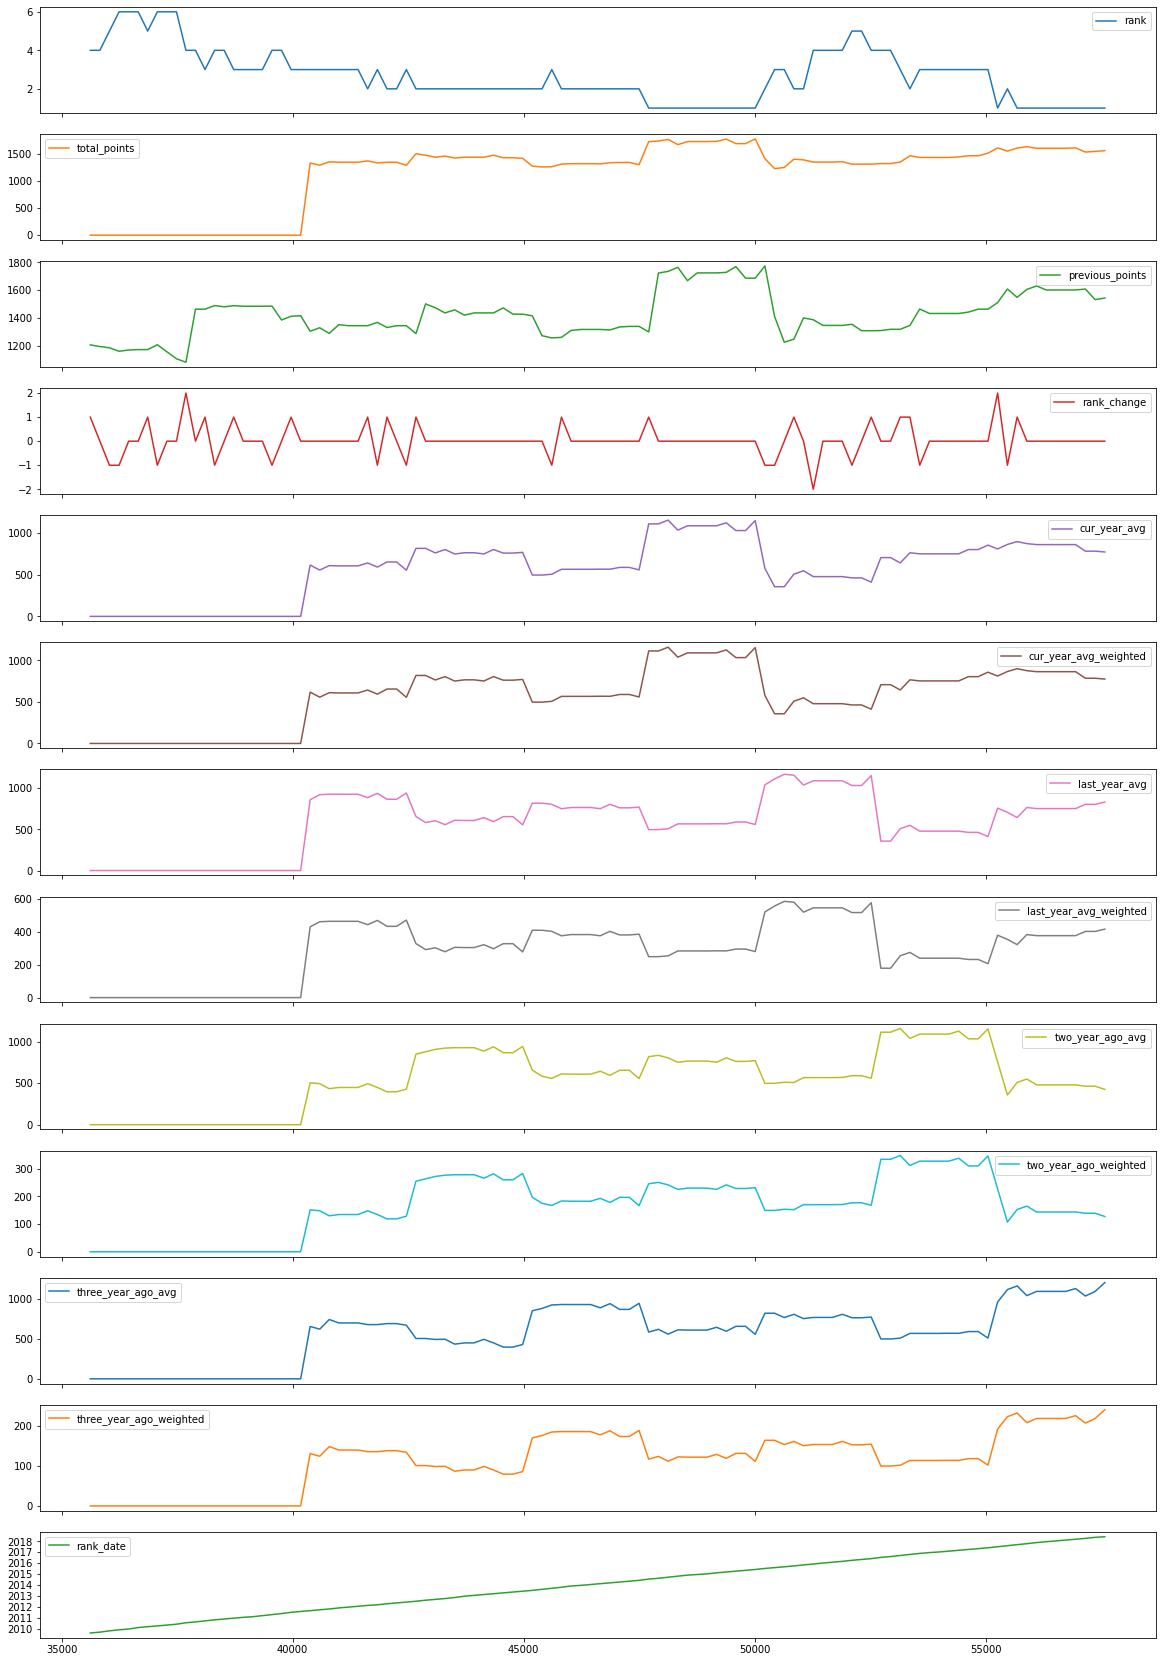

In [445]:

Germany = rankings_appr[(rankings_appr['country_full'] == 'Germany')]
axes = Germany.plot.line(subplots=True,figsize=(20, 30))
type(axes)



<AxesSubplot:xlabel='rank_date'>

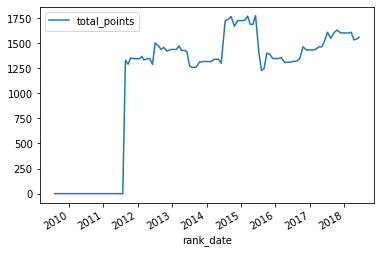

In [446]:
Germany.plot('rank_date', 'total_points' )

<AxesSubplot:xlabel='rank_date'>

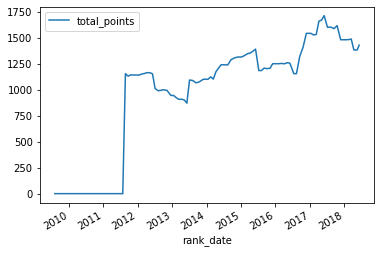

In [447]:
Brazil = rankings_appr[(rankings_appr['country_full'] == 'Brazil')]
Brazil.plot('rank_date', 'total_points' )

Based on the out puts above, we expect Germany to come out on top based on their ability to maintain a higher ranking compared to Brazil accross the years.

In [448]:

sorted_rank = ger_bra.sort_values(by=['rank_date'], ascending=False)
sorted_rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57583,2,Brazil,BRA,1430.57,1384,0,558.95,558.95,1082.36,541.18,560.21,168.06,811.88,162.38,CONMEBOL,2018-06-07
57582,1,Germany,GER,1558.49,1544,0,775.06,775.06,832.00,416.00,424.26,127.28,1200.77,240.15,UEFA,2018-06-07
57371,1,Germany,GER,1543.99,1533,0,784.89,784.89,804.19,402.09,463.51,139.05,1089.77,217.95,UEFA,2018-05-17
57372,2,Brazil,BRA,1384.24,1384,0,560.52,560.52,990.59,495.29,565.90,169.77,793.26,158.65,CONMEBOL,2018-05-17
57160,1,Germany,GER,1532.68,1609,0,784.89,784.89,804.19,402.09,463.51,139.05,1033.19,206.64,UEFA,2018-04-12


/var/folders/fx/g8czx7fs49jg83f3f0zm_7_80000gn/T/ipykernel_99944/1523947830.py:9: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


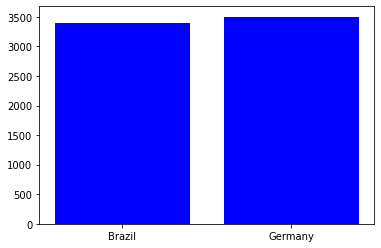

In [449]:
# creates a bar graph of size 15 inches wide and 10 inches high
# plot bars in stack manner
x = sorted_rank['country_full']
y1 = sorted_rank['total_points']
y2 = sorted_rank['previous_points']

plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.show()

### Bivariate Analysis

In [491]:
data['tournament_bl'].unique()

array([1, 0])

               home_score  away_score   neutral    Points   Team_bl  \
home_score       1.000000   -0.236833 -0.028515  0.326400 -0.099061   
away_score      -0.236833    1.000000 -0.079944 -0.311764  0.044054   
neutral         -0.028515   -0.079944  1.000000  0.052606  0.189030   
Points           0.326400   -0.311764  0.052606  1.000000 -0.095149   
Team_bl         -0.099061    0.044054  0.189030 -0.095149  1.000000   
tournament_bl   -0.014444    0.054424 -0.438532 -0.210154  0.082051   
Team_Index            NaN         NaN       NaN       NaN       NaN   

               tournament_bl  Team_Index  
home_score         -0.014444         NaN  
away_score          0.054424         NaN  
neutral            -0.438532         NaN  
Points             -0.210154         NaN  
Team_bl             0.082051         NaN  
tournament_bl       1.000000         NaN  
Team_Index               NaN         NaN  


<AxesSubplot:title={'center':'\nCorrelation Matrix '}>

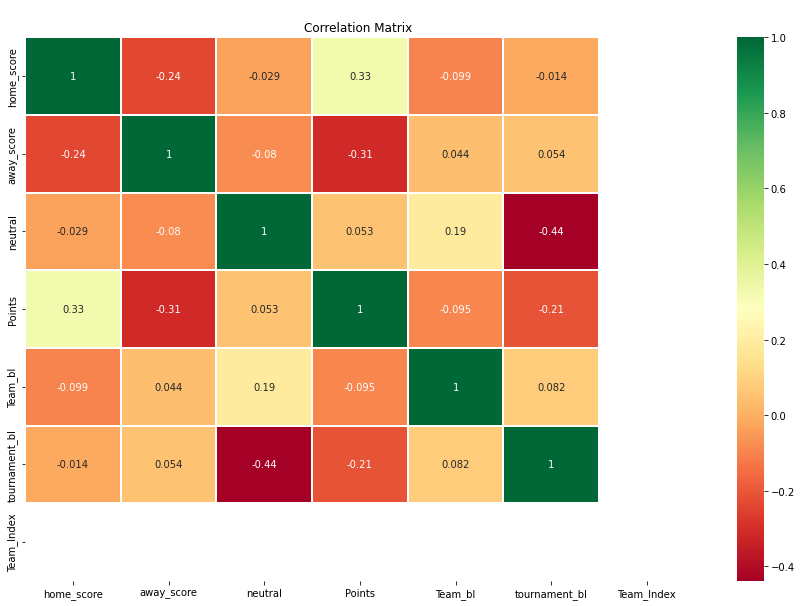

In [492]:
print(data.corr())

# let's use a heatmap to plot the correlation between the features

#specify size of heatmap
fig, ax = plt.subplots(figsize=(15, 10))
plt.title("\nCorrelation Matrix ")

#create seaborn heatmap
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)

<AxesSubplot:xlabel='date'>

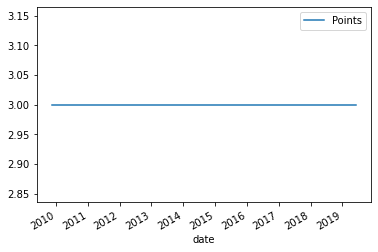

In [493]:
# # stacked bar chart
# data.groupby(data['home_team'] == 'Brazil').agg({'Points':'sum'}).plot.hist(stacked=True)
# data.groupby(data['away_team'] == 'Brazil').agg({'Points':'sum'}).plot.hist(stacked=True)


Brazil = data[(data['home_team'] == 'Brazil') ]
Brazil.plot('date', 'Points' )

<AxesSubplot:xlabel='date'>

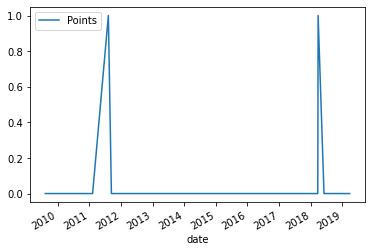

In [494]:
Brazil = data[(data['away_team'] == 'Brazil') ]
Brazil.plot('date', 'Points' )

<AxesSubplot:xlabel='date'>

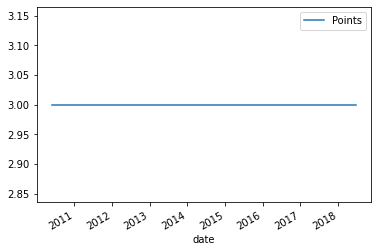

In [495]:
Germany_data = data[(data['away_team'] == 'Germany') ]
Germany_data.plot('date', 'Points' )

<AxesSubplot:xlabel='date'>

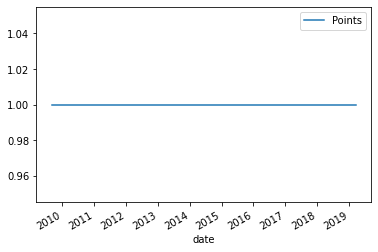

In [496]:
Germany_data = data[(data['home_team'] == 'Germany') ]
Germany_data.plot('date', 'Points' )

In [497]:
data.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'Points', 'Team', 'Team_bl',
       'tournament_bl', 'Team_Index'],
      dtype='object')

### Regression Analysis

### Preparation for Prediction Analysis

In [27]:
import os
import glob
import pandas as pd
import pandasql as psql
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

In [500]:
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Points,Team,Team_bl,tournament_bl,Team_Index
31443,2009-08-12,Estonia,Brazil,0,1,Friendly,Tallinn,Estonia,0,0.0,Brazil,1,1,0
31515,2009-09-05,Germany,South Africa,2,0,Friendly,Leverkusen,Germany,0,1.0,Germany,0,1,0
31716,2009-11-14,Brazil,England,1,0,Friendly,Doha,Qatar,1,3.0,Brazil,1,1,0
31758,2009-11-17,Oman,Brazil,0,2,Friendly,Muscat,Oman,0,0.0,Brazil,1,1,0
31769,2009-11-18,Germany,Ivory Coast,2,2,Friendly,Gelsenkirchen,Germany,0,1.0,Germany,0,1,0


### Including a Rankings Column to show the results of the matches played

In [554]:
# Implementing the Solution
# 
# we shall compare the home and away score and award points with respect to the home score

# create a value pair for home_score and away score
home_score = data['home_score'].tolist()
away_score = data['away_score'].tolist()
scores = list(zip(home_score,away_score))

# create an empty list to append points
rank_points = []

# compare each value pair to award scores
for score in scores:
    if score[0] > score[1]:
       point = 1
    elif  score[0] == score[1]:  
       point = 0.5
    else:
       point = 0
    rank_points.append(point)    

# convert rank_points into a dataframe 
rank_points = pd.DataFrame(rank_points)

# rename column to rank_points
rank_points.columns = ['rank_points']
rank_points.head()

,rank_points
0,0.0
1,1.0
2,1.0
3,0.0
4,0.5


In [28]:
#convert the Home and Away columns into numbers representing the teams indexes
data["Team"] = data["Team"].astype('category')
data["Team_Index"] = data["Team"].cat.codes




In [29]:
#get the key for our Home and Away Indexes 
index = psql.sqldf("SELECT DISTINCT Team_Index, Team FROM data ORDER BY Team_Index")
print(index)

   Team_Index     Team
0           0   Brazil
1           1  Germany


Text(0.5, 1.0, 'Histogram of the Number of draws vs wins vs losses')

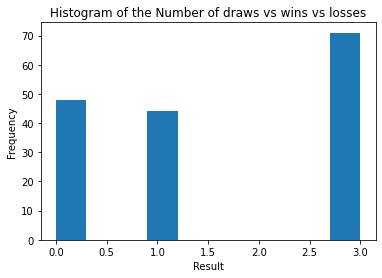

In [559]:
#histogram of the amount of draws vs wins vs losses
plt.hist(data["Points"])

# label axes
plt.xlabel("Result")
plt.ylabel("Frequency")
plt.title("Histogram of the Number of draws vs wins vs losses")

In [560]:
ger_bra.head()

,rank,Team,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
50014,1,Germany,GER,1775.03,1687,0,1153.12,1153.12,559.35,279.68,770.63,231.19,555.23,111.05,UEFA,2015-06-04
49387,1,Germany,GER,1770.06,1729,0,1126.04,1126.04,567.58,283.79,805.07,241.52,593.50,118.70,UEFA,2015-03-12
48129,1,Germany,GER,1765.05,1736,0,1158.66,1158.66,507.09,253.55,804.67,241.40,557.21,111.44,UEFA,2014-09-18
47919,1,Germany,GER,1735.72,1724,0,1112.98,1112.98,497.45,248.73,834.82,250.45,617.83,123.57,UEFA,2014-08-14
49178,1,Germany,GER,1728.78,1725,0,1090.54,1090.54,568.45,284.23,751.40,225.42,642.96,128.59,UEFA,2015-02-12


In [30]:
ger_bra.rename(columns = {'country_full':'Team',}, inplace = True)
ger_bra.head()


/var/folders/fx/g8czx7fs49jg83f3f0zm_7_80000gn/T/ipykernel_20440/3137769508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ger_bra.rename(columns = {'country_full':'Team',}, inplace = True)


,rank,Team,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
50014,1,Germany,GER,1775.03,1687,0,1153.12,1153.12,559.35,279.68,770.63,231.19,555.23,111.05,UEFA,2015-06-04
49387,1,Germany,GER,1770.06,1729,0,1126.04,1126.04,567.58,283.79,805.07,241.52,593.50,118.70,UEFA,2015-03-12
48129,1,Germany,GER,1765.05,1736,0,1158.66,1158.66,507.09,253.55,804.67,241.40,557.21,111.44,UEFA,2014-09-18
47919,1,Germany,GER,1735.72,1724,0,1112.98,1112.98,497.45,248.73,834.82,250.45,617.83,123.57,UEFA,2014-08-14
49178,1,Germany,GER,1728.78,1725,0,1090.54,1090.54,568.45,284.23,751.40,225.42,642.96,128.59,UEFA,2015-02-12


/var/folders/fx/g8czx7fs49jg83f3f0zm_7_80000gn/T/ipykernel_99944/2068475363.py:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


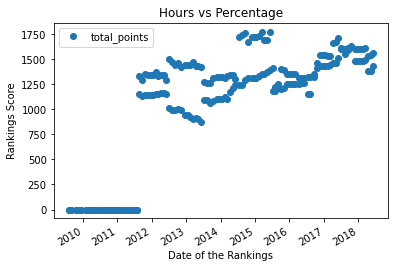

In [562]:
# Plotting to find any relationship between the variables
# 
ger_bra.plot(x='rank_date', y='total_points', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Date of the Rankings')
plt.ylabel('Rankings Score')
plt.show()

In [511]:
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Points,Team,Team_bl,tournament_bl,Team_Index
31443,2009-08-12,Estonia,Brazil,0,1,Friendly,Tallinn,Estonia,0,0.0,Brazil,1,1,0
31515,2009-09-05,Germany,South Africa,2,0,Friendly,Leverkusen,Germany,0,1.0,Germany,0,1,1
31716,2009-11-14,Brazil,England,1,0,Friendly,Doha,Qatar,1,3.0,Brazil,1,1,0
31758,2009-11-17,Oman,Brazil,0,2,Friendly,Muscat,Oman,0,0.0,Brazil,1,1,0
31769,2009-11-18,Germany,Ivory Coast,2,2,Friendly,Gelsenkirchen,Germany,0,1.0,Germany,0,1,1


In [512]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 31443 to 40630
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           163 non-null    datetime64[ns]
 1   home_team      163 non-null    object        
 2   away_team      163 non-null    object        
 3   home_score     163 non-null    int64         
 4   away_score     163 non-null    int64         
 5   tournament     163 non-null    object        
 6   city           163 non-null    object        
 7   country        163 non-null    object        
 8   neutral        163 non-null    int64         
 9   Points         163 non-null    float64       
 10  Team           163 non-null    category      
 11  Team_bl        163 non-null    int64         
 12  tournament_bl  163 non-null    int64         
 13  Team_Index     163 non-null    int8          
dtypes: category(1), datetime64[ns](1), float64(1), int64(5), int8(1), ob

## Model Building

### Logidtic Regression

### Residual plots and heteroskedasticity testing

In [32]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X = data.iloc[:, 12:13].values
y = data.iloc[:, 9].values

X_train, X_test, admit_train, admit_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, admit_train)

# This is our prediction for admission based on our model
admit_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(admit_predict, admit_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

-0.06643356643356656

The Model represents 0.66%, hence stating that we could maybe need to change a few elements to get accurate analysis

/var/folders/fx/g8czx7fs49jg83f3f0zm_7_80000gn/T/ipykernel_99944/821253564.py:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


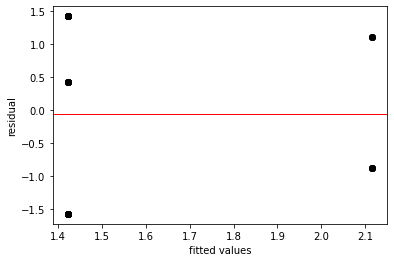

In [514]:
import matplotlib.pyplot as plt

plt.scatter(admit_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

Our residuals are not centered around the mean as first feared. Hence confirming the inappropriatness of the model. i will however run a Bartlet test to confirm

In [515]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(admit_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(admit_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# 
# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

128.0288766178579
the variances are homogeneous!


In [516]:
data.describe()

,home_score,away_score,neutral,Points,Team_bl,tournament_bl,Team_Index
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,1.472393,1.361963,0.368098,1.576687,0.595092,0.797546,0.404908
std,1.496139,1.391429,0.483774,1.309489,0.492387,0.403067,0.492387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,2.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
max,8.000000,7.000000,1.000000,3.000000,1.000000,1.000000,1.000000


/var/folders/fx/g8czx7fs49jg83f3f0zm_7_80000gn/T/ipykernel_99944/2994496391.py:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


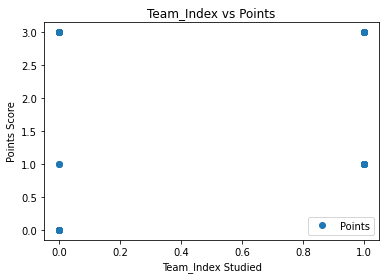

In [517]:
# Plotting to find any relationship between the variables
# 
data.plot(x='Team_Index', y='Points', style='o')
plt.title('Team_Index vs Points')
plt.xlabel('Team_Index Studied')
plt.ylabel('Points Score')
plt.show()


In [518]:
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Points,Team,Team_bl,tournament_bl,Team_Index
31443,2009-08-12,Estonia,Brazil,0,1,Friendly,Tallinn,Estonia,0,0.0,Brazil,1,1,0
31515,2009-09-05,Germany,South Africa,2,0,Friendly,Leverkusen,Germany,0,1.0,Germany,0,1,1
31716,2009-11-14,Brazil,England,1,0,Friendly,Doha,Qatar,1,3.0,Brazil,1,1,0
31758,2009-11-17,Oman,Brazil,0,2,Friendly,Muscat,Oman,0,0.0,Brazil,1,1,0
31769,2009-11-18,Germany,Ivory Coast,2,2,Friendly,Gelsenkirchen,Germany,0,1.0,Germany,0,1,1


In [33]:
#declare independent and dependent variables, and remove categoric variables
X = data.iloc[:, 12:13].values
y = data.iloc[:, 9].values



In [520]:
# Splitting the data
# ---
# The next step is to split this data into training and test sets. 
# We'll do this by using Scikit-Learn's built-in train_test_split() method
# ---
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [521]:
# Training the Algorithm
# ---
# 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [522]:
# intercept
# 
print(regressor.intercept_)

# slope
# 
print(regressor.coef_)

2.1153846153846154
[-0.69230769]


In [523]:
# Making Predictions
# ---
# Now that we have trained our algorithm, it's time to make some predictions. 
# To do so, we will use our test data and see how accurately our algorithm predicts the percentage score. 
# To make pre-dictions on the test data, execute the following
# ---
# 

# The y_pred is a numpy array that contains all the predicted values 
# for the input values in the X_test series.
# 
y_pred = regressor.predict(X_test)

# To compare the actual output values for X_test with the predicted values, execute the following 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,0.0,1.423077
1,3.0,2.115385
2,3.0,1.423077
3,1.0,1.423077
4,1.0,2.115385
5,0.0,1.423077
6,3.0,1.423077
7,0.0,1.423077
8,0.0,1.423077
9,3.0,1.423077


In [524]:

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# From the output, we will see that the value of root mean squared error is 1.2734619027906033,
# which is less than 10% of the mean value of the percentages of all the students i.e. 40.4908

Mean Absolute Error: 1.1993006993006994
Mean Squared Error: 1.6217052178590639
Root Mean Squared Error: 1.2734619027906033


In [525]:
data.describe()

,home_score,away_score,neutral,Points,Team_bl,tournament_bl,Team_Index
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,1.472393,1.361963,0.368098,1.576687,0.595092,0.797546,0.404908
std,1.496139,1.391429,0.483774,1.309489,0.492387,0.403067,0.492387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,2.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
max,8.000000,7.000000,1.000000,3.000000,1.000000,1.000000,1.000000


### Polynomial Regression

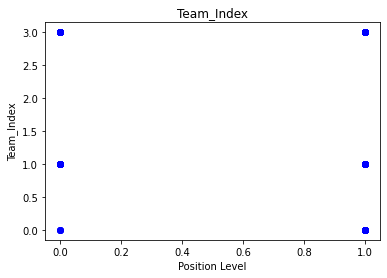

In [42]:
# Since our dataset is pretty clean, let's start by visualizing our dataset by plotting a scatter plot

plt.scatter(X, y, color='blue') 
plt.title('Team_Index')
plt.xlabel('Position Level')
plt.ylabel('Team_Index')
plt.show()

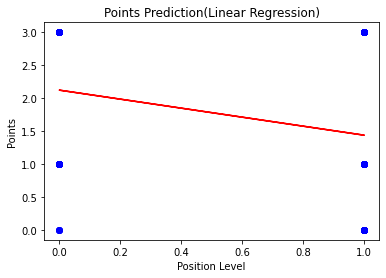

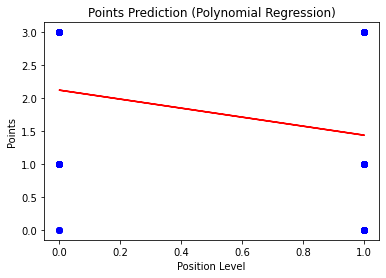

array([-10.08295455])

In [43]:
# Split the dataset into train and test sets
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)


# Fit Linear Regression model to the dataset(this is optional. We are doing this for the sole purpose of comparing the linear regression model to the polynomial regression model)
reg_line = LinearRegression()
# reg_line.fit(X,y)
reg_line.fit(X,y)

# Visualize the Linear Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, reg_line.predict(X), color='red')
plt.title('Points Prediction(Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Points')
plt.show()


# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Points Prediction (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Points')
plt.show()

pol_reg.predict(poly_reg.fit_transform([[5.5]]))

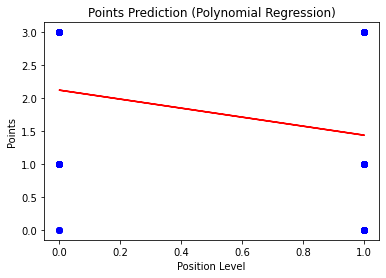

In [44]:
# To improve on the model, all we need to do is to increase degree of the polynomial
# Let's increase the degree to 3

# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 6) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Points Prediction (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Points')
plt.show()

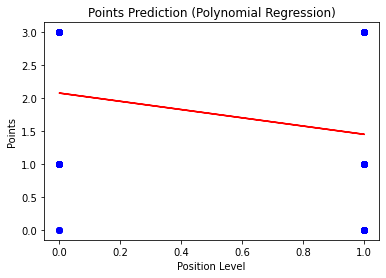

In [46]:

# Now we know where our cap is, let's decrease the degrees slightly 

# Fit polynomial Regression to the dataset
poly_reg_4 = PolynomialFeatures(degree = 4) 
X_poly = poly_reg_4.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Points Prediction (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Points')
plt.show()

In [47]:
# Predict using linear regression
lin_pred = reg_line.predict([[6.5]])
print('Linear prediction: %d' %lin_pred)

# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg_4.fit_transform([[6.5]]))
print('Polynomial prediction: %d' %poly_pred)

# We can also get the predictions as an array
poly_arr_pred = pol_reg.predict(poly_reg_4.fit_transform(X))

Linear prediction: -2
Polynomial prediction: 52051468522336912


Neither the Polynomial nor Linear Regression gives appropriate results to be used for this analysis hence need to go further using more/other tests

### Multiple Linear Regression

In [526]:
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Points,Team,Team_bl,tournament_bl,Team_Index
31443,2009-08-12,Estonia,Brazil,0,1,Friendly,Tallinn,Estonia,0,0.0,Brazil,1,1,0
31515,2009-09-05,Germany,South Africa,2,0,Friendly,Leverkusen,Germany,0,1.0,Germany,0,1,1
31716,2009-11-14,Brazil,England,1,0,Friendly,Doha,Qatar,1,3.0,Brazil,1,1,0
31758,2009-11-17,Oman,Brazil,0,2,Friendly,Muscat,Oman,0,0.0,Brazil,1,1,0
31769,2009-11-18,Germany,Ivory Coast,2,2,Friendly,Gelsenkirchen,Germany,0,1.0,Germany,0,1,1


### Residual plots and heteroskedasticity testing

In [563]:

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# X = data.iloc[:, 12:13].values
# y = data.iloc[:, 9].values
X = data[['neutral', 'Points', 'Team_bl', 'tournament_bl',	 'home_score','away_score']].values
y = data['Team_Index'].values

X_train, X_test, admit_train, admit_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, admit_train)

# This is our prediction for admission based on our model
admit_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(admit_predict, admit_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

-3.700743415417188e-17

/var/folders/fx/g8czx7fs49jg83f3f0zm_7_80000gn/T/ipykernel_99944/821253564.py:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


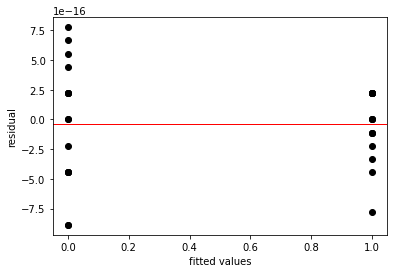

In [539]:
import matplotlib.pyplot as plt

plt.scatter(admit_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [564]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(admit_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(admit_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# 
# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


In [565]:
# Preparing the Data
# ---
# Dividing the data into attributes and labels as we did previously. 
# However, unlike last time, this time around we are going to use column names for creating an attribute set and label.
# ---
# 

X = data[['neutral', 'Points', 'Team_bl', 'tournament_bl',	 'home_score','away_score']]
y = data['Team_Index']

In [566]:
# Dividing our data into training and test sets
# ---
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [567]:
# Training the Algorithm
# ---
# To train the algorithm we execute the same code as before, using the fit() method of the LinearRegression class
# ---
# 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [568]:
# In case of multivariable linear regression, the regression model has to 
# find the most optimal coefficients for all the attributes. 
# To see what coefficients our regression model has chosen, execute the following
# 
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
neutral,3.330545e-16
Points,-1.665335e-16
Team_bl,-1.000000e+00
tournament_bl,4.996004e-16
home_score,-1.370432e-16
away_score,-9.714451e-17


The Out put above shows that a unit increase or change in the ttype of team (brazil or germany) shows a change or rather is represented by the coefficients as decsribed above.
- A neutral ground and the points acchieved as a result of a match played are the biggest and positively affected values in the formular.

In [569]:
# Making Predictions
# ---
# To make pre-dictions on the test data, execute the following
# ---
# 
y_pred = regressor.predict(X_test)

# To compare the actual output values for X_test with the predicted values
# 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
40497,0,0.000000e+00
39920,0,-4.440892e-16
35104,0,-4.440892e-16
31999,1,1.000000e+00
36124,1,1.000000e+00
34066,0,6.661338e-16
38494,1,1.000000e+00
33585,0,2.220446e-16
32396,0,5.551115e-16
36006,0,-4.440892e-16


In [570]:
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.1960965860421174e-16
Mean Squared Error: 1.654665629795967e-31
Root Mean Squared Error: 4.0677581415270584e-16


10% of the mean which is 40.4908, is considerably larger than the RMSE which is 3.545135

This shows that the model is accurate and represents a good fit for analysis.

### Random Forest Approach

In [571]:
#use random forest now to do the same thing as logistic regressionl, see if there are any imporvements
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)
y_pred = rand_forest.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
baseline_acc = len(y[y == 0]) / len(y) 
cohens_score = cohen_kappa_score(y_test, y_pred)
print(acc_score, baseline_acc, cohens_score)

1.0 0.5950920245398773 1.0


The Random Approach ensures a cohen coeffecient of 100 % hence the accuracy of the model being more ideal for the study.

In [572]:
rand_forest.feature_importances_

array([0.02197434, 0.19637929, 0.68817093, 0.01510515, 0.03310687,
       0.04526343])

Text(0.5, 1.0, 'Feature importance using random forest')

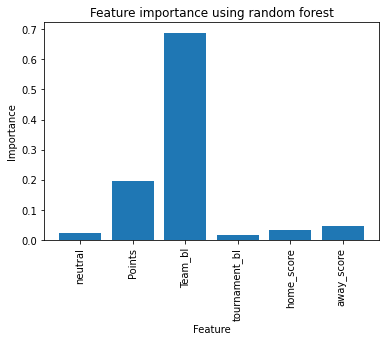

In [573]:
#create a feature importance bar chart
rand_forest_importance = range(0, len(rand_forest.feature_importances_))
plt.bar(x = rand_forest_importance, height = rand_forest.feature_importances_)
plt.xticks(rand_forest_importance, X.columns, rotation=90)

# label axes
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature importance using random forest")

The Output above shows that the Points achived after a match and the type of team are the most critical values in the establishment of whether the team is successfull or not prediction

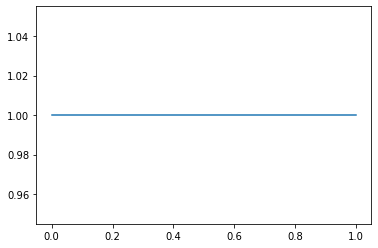

In [574]:
#use K-folds for cross-validation on the random forest model
fold_perf = []

kf = KFold(n_splits=2, shuffle=False)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rand_forest = RandomForestClassifier()
    rand_forest.fit(X_train, y_train)
    y_pred = rand_forest.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)
    fold_perf.append(acc_score)

plt.plot(fold_perf)

In [575]:
#create hyperparameters in order to cross-validate the model 
hyperparam_grid = {'n_estimators': [3, 100, 1000],
                   'max_features': [0.05, 0.5, 0.95],
                   'max_depth': [10, 50, 100, None]}

grid_scorer = make_scorer(cohen_kappa_score)
rand_forest = GridSearchCV(RandomForestClassifier(), hyperparam_grid, cv=kf, scoring=grid_scorer)
rand_forest.fit(X, y)

GridSearchCV(cv=KFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 50, 100, None],
                         'max_features': [0.05, 0.5, 0.95],
                         'n_estimators': [3, 100, 1000]},
             scoring=make_scorer(cohen_kappa_score))

In [576]:
print(rand_forest.best_score_)
print(rand_forest.best_params_)

1.0
{'max_depth': 10, 'max_features': 0.05, 'n_estimators': 100}


In [577]:
#Used the random forest to predict points achieved
np.set_printoptions(threshold=np.inf)
model_predictions = rand_forest.predict(X_test)
i = 1
predicted = model_predictions.tolist()
actual = y_test.tolist()
print(predicted)
print(actual)

[1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]
[1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]


In [578]:
print(len(actual))
print(len(predicted))
print(len(y_test))
print(len(X_test))

81
81
81
81


### Do not rerun

In [579]:
### DO NOT RE-RUN ###
#comnbine the predictions and the team to find out their points total

predicted_df = X_test
predicted_df['Points'] = predicted
predicted_df.head()

/var/folders/fx/g8czx7fs49jg83f3f0zm_7_80000gn/T/ipykernel_99944/3138698460.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predicted_df['Points'] = predicted


,neutral,Points,Team_bl,tournament_bl,home_score,away_score
35636,0,1,0,1,1,1
35657,1,0,1,1,0,5
35673,1,0,1,1,2,1
35678,0,1,0,1,0,1
35824,0,1,0,1,1,0


In [586]:
index

,Team_Index,Team
0,0,Brazil
1,1,Germany


In [580]:
print(type(index))
print(index.columns)
print(type(df))
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index(['Team_Index', 'Team'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
          Actual     Predicted
count  33.000000  3.300000e+01
mean    0.484848  4.848485e-01
std     0.507519  5.075192e-01
min     0.000000 -8.881784e-16
25%     0.000000  0.000000e+00
50%     0.000000  7.771561e-16
75%     1.000000  1.000000e+00
max     1.000000  1.000000e+00


In [581]:
#sum the points
cleaned_prediction = psql.sqldf("SELECT Team_bl, SUM(Points) as Standing FROM predicted_df GROUP BY Team_bl ORDER BY Standing DESC")
print(cleaned_prediction)

   Team_bl  Standing
0        0        36
1        1         0


In [587]:
#final predicions table
bindi = pd.DataFrame(index)
final_prediction = psql.sqldf("SELECT Team_bl, Standing FROM cleaned_prediction c LEFT OUTER JOIN bindi b ON Team_Index = Team_Index ORDER BY Standing DESC")

final_prediction.head(20)

,Team_bl,Standing
0,0,36
1,0,36
2,1,0
3,1,0


In [588]:
#final predicions table
bindi = pd.DataFrame(index)
final_prediction = psql.sqldf("SELECT Team, Standing FROM cleaned_prediction LEFT OUTER JOIN bindi ON Team_Index = Team_Index ORDER BY Standing DESC")
final_prediction.head()

,Team,Standing
0,Brazil,36
1,Germany,36
2,Brazil,0
3,Germany,0


The Output above shows that the two teams are not so different as the points accuulation shows that the teams will definately have siilar results in the future hence showing that none will have the upper hand in terms of winning more matches or accumulating more points